# Python文本分析常用库



- jieba
- NLTK
- TextBlob
- gensim
- spacCy
- 

https://github.com/stars/zhiliang-lin/lists/nlp

# jieba

In [1]:
import jieba

In [2]:

# 中文文本
text = "我喜欢使用jieba进行中文分词。"

# 精确分词
seg_list = jieba.cut(text, cut_all=False)

# 输出分词结果
print("精确模式分词结果: " + "/ ".join(seg_list))


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.730 seconds.
Prefix dict has been built successfully.


精确模式分词结果: 我/ 喜欢/ 使用/ jieba/ 进行/ 中文/ 分词/ 。


# wordcloud

In [9]:
# -*- coding: utf-8 -*-

from wordcloud import WordCloud
import jieba
import matplotlib.pyplot as plt
# 设置字体路径（Windows 示例）
font_path = "C:\\Windows\\Fonts\\simhei.ttf"



In [3]:

# 中文文本（一段较长的文本，可以是文章或评论等）
text = """
Python是一种高级、解释型和通用的编程语言。它的设计具有强调代码可读性和编写者的程序设计的能力的特点，同时提供了大量的标准库以支持任务的多样化，从而使Python成为其他语言之一的综合语言。
在Python中，你可以轻松地执行数学计算、处理文本、创建图形用户界面、解决网络问题等等。它是一门简单而强大的语言，适用于初学者和专业开发人员。
这是一段简短的介绍，但它包含了很多关键词，比如Python、编程语言、代码可读性、标准库等等。

"""


In [10]:

# 使用jieba进行中文分词
seg_list = jieba.cut(text, cut_all=False)
seg_str = "/".join(seg_list)
seg_str

'TextBlob/是/一个/很棒/的/自然语言/处理/库/。/我/喜欢/使用/它/进行/情感/分析/和/文本处理/。'

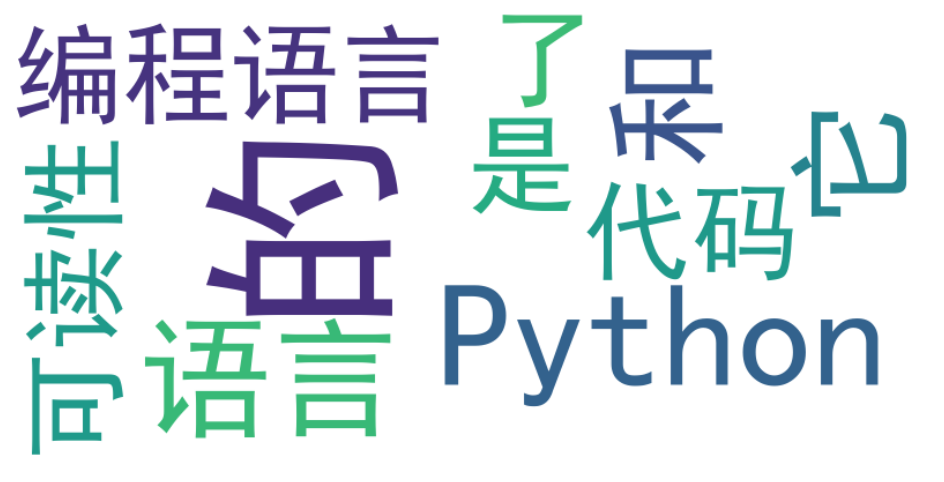

In [5]:

# 创建词云对象
wordcloud = WordCloud(
    width=800,               # 图片宽度
    height=400,              # 图片高度
    background_color='white', # 背景颜色
    font_path=font_path,       # 中文字体
    max_words=10,             # 词云中的最大单词数
).generate(seg_str)

# 显示词云图
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## 使用停用词

In [18]:

# 停用词列表
stop_words = ["是", "一种", "和", "的", "它", "在", "你", "可以", "地", "执行", "处理", "创建", "是", "一门", "而", "适用于", "这是", "一段", "的", "但它", "包含了", "很多", "比如"]

# 对文本进行分词并去除停用词
def chinese_word_cut(text):
    words = " ".join([word for word in jieba.cut(text) if word not in stop_words])
    return words

# 分词后的文本
text_cut = chinese_word_cut(text)

In [19]:
text_cut

'\n Python 高级 、 解释 型 通用 编程语言 。 设计 具有 强调 代码 可读性 编写者 程序设计 能力 特点 ， 同时 提供 了 大量 标准 库以 支持 任务 多样化 ， 从而 使 Python 成为 其他 语言 之一 综合 语言 。 \n Python 中 ， 轻松 数学计算 、 文本 、 图形用户界面 、 解决 网络 问题 等等 。 简单 强大 语言 ， 适用 于 初学者 专业 开发人员 。 \n 简短 介绍 ， 但 包含 了 关键词 ， Python 、 编程语言 、 代码 可读性 、 标准 库 等等 。 \n'

# TF-IDF

In [15]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:


# 给定的文本
text = """
Python是一种高级、解释型和通用的编程语言。它的设计具有强调代码可读性和编写者的程序设计的能力的特点，同时提供了大量的标准库以支持任务的多样化，从而使Python成为其他语言之一的综合语言。
在Python中，你可以轻松地执行数学计算、处理文本、创建图形用户界面、解决网络问题等等。它是一门简单而强大的语言，适用于初学者和专业开发人员。
这是一段简短的介绍，但它包含了很多关键词，比如Python、编程语言、代码可读性、标准库等等。
"""

# 对文本进行分词
def chinese_word_cut(text):
    words = " ".join(jieba.cut(text))
    return words

# 分词后的文本
text_cut = chinese_word_cut(text)

# 创建TfidfVectorizer
vectorizer = TfidfVectorizer()

# 拟合并转换文本
tfidf_matrix = vectorizer.fit_transform([text_cut])

# 获取特征名（词汇）
feature_names = vectorizer.get_feature_names_out()

# 将TF-IDF矩阵转换为DataFrame以便更好地可视化
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# 显示TF-IDF矩阵
print(df_tfidf)



     python        一段        一种        一门        专业        之一        介绍  \
0  0.412568  0.103142  0.103142  0.103142  0.103142  0.103142  0.103142   

         从而        代码        任务  ...        解决        解释        设计        语言  \
0  0.103142  0.206284  0.103142  ...  0.103142  0.103142  0.103142  0.309426   

         轻松        这是        适用        通用        问题        高级  
0  0.103142  0.103142  0.103142  0.103142  0.103142  0.103142  

[1 rows x 56 columns]


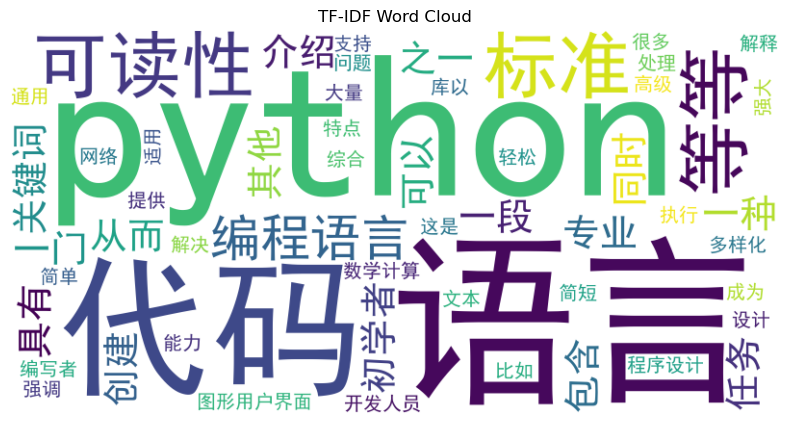

In [17]:


# 将TF-IDF结果转换为字典，以便用于生成词云
tfidf_dict = dict(zip(feature_names, df_tfidf.iloc[0]))

# 创建词云
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='simhei.ttf').generate_from_frequencies(tfidf_dict)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF Word Cloud')
plt.show()


# TextBlob

In [6]:
from textblob import TextBlob
import nltk

In [7]:

# 示例文本
text = "TextBlob是一个很棒的自然语言处理库。我喜欢使用它进行情感分析和文本处理。"

# 创建TextBlob对象
blob = TextBlob(text)


In [8]:

# 1. 分词（Tokenization）
words = blob.words
print("分词结果:", words)


分词结果: ['TextBlob是一个很棒的自然语言处理库。我喜欢使用它进行情感分析和文本处理。']


In [33]:

# 2. 词性标注（Part-of-speech Tagging）
pos_tags = blob.tags
print("\n词性标注结果:", pos_tags)



词性标注结果: [('TextBlob是一个很棒的自然语言处理库。我喜欢使用它进行情感分析和文本处理。', 'NN')]


In [34]:

# 3. 名词短语提取（Noun Phrase Extraction）
noun_phrases = blob.noun_phrases
print("\n名词短语提取结果:", noun_phrases)



名词短语提取结果: ['textblob是一个很棒的自然语言处理库。我喜欢使用它进行情感分析和文本处理。']


In [37]:

# 4. 情感分析（Sentiment Analysis）

# 示例文本
text_positive = "I love using TextBlob. It's amazing!"
text_negative = "This tool is terrible. I hate it."

# 创建TextBlob对象
blob_positive = TextBlob(text_positive)
blob_negative = TextBlob(text_negative)

# 获取情感分析结果
sentiment_positive = blob_positive.sentiment
sentiment_negative = blob_negative.sentiment

# 输出结果
print("Positive Sentiment:", sentiment_positive)
print("Negative Sentiment:", sentiment_negative)



Positive Sentiment: Sentiment(polarity=0.625, subjectivity=0.75)
Negative Sentiment: Sentiment(polarity=-0.9, subjectivity=0.95)


In [47]:

# 5. 中文翻译（Translation）
translated_text = blob.translate(to='en')
print("\n翻译结果:", translated_text)


AttributeError: 'list' object has no attribute 'strip'

In [31]:

# 6. 词频统计（Word Frequencies）
word_frequencies = blob.word_counts
print("\n词频统计结果:", word_frequencies)



词频统计结果: defaultdict(<class 'int'>, {'textblob是一个很棒的自然语言处理库。我喜欢使用它进行情感分析和文本处理。': 1})


# gensim

In [44]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # 下载分词所需的数据集


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:

# 示例文本
text = "Word embeddings are dense vector representations of words."

# 分词
tokens = word_tokenize(text.lower())


In [46]:

# 使用Word2Vec训练词嵌入模型
model = Word2Vec([tokens], vector_size=10, window=3, min_count=1, workers=4)

# 查找与某个词相似的词汇
similar_words = model.wv.most_similar('word', topn=3)

# 输出结果
print("Similar words to 'word':", similar_words)


Similar words to 'word': [('.', 0.3792897164821625), ('dense', 0.27556225657463074), ('representations', 0.20713213086128235)]


## LDA算法

In [48]:
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

# 假设有一组文本数据
corpus = [
    '这是一个关于LDA主题抽取的例子。',
    'LDA主题抽取是一种无监督学习方法。',
    '在LDA中，文档被表示为主题的分布。'
]

# 分词
tokenized_corpus = [doc.split() for doc in corpus]

# 创建词典（Dictionary）和文档-词频矩阵（Corpus）
dictionary = corpora.Dictionary(tokenized_corpus)
corpus_bow = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

# 使用LDA模型进行主题抽取
lda_model = LdaModel(corpus_bow, num_topics=2, id2word=dictionary, passes=10)

# 打印每个主题的词汇分布
pprint(lda_model.print_topics())

# 获取文档的主题分布
for i, doc in enumerate(corpus_bow):
    print(f"Document {i + 1} - Topic Distribution: {lda_model.get_document_topics(doc)}")


[(0,
  '0.429*"LDA主题抽取是一种无监督学习方法。" + 0.415*"在LDA中，文档被表示为主题的分布。" + '
  '0.156*"这是一个关于LDA主题抽取的例子。"'),
 (1,
  '0.563*"这是一个关于LDA主题抽取的例子。" + 0.228*"在LDA中，文档被表示为主题的分布。" + '
  '0.209*"LDA主题抽取是一种无监督学习方法。"')]
Document 1 - Topic Distribution: [(0, 0.25860384), (1, 0.7413962)]
Document 2 - Topic Distribution: [(0, 0.730787), (1, 0.26921302)]
Document 3 - Topic Distribution: [(0, 0.72380203), (1, 0.27619797)]


# sklearn

## K-means算法